In [1]:
from pathlib import Path
import os
import warnings

%load_ext autoreload
%autoreload

# ignore warnings for now ...
warnings.filterwarnings('ignore')

if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

!pwd

/Users/tommylees/github/ml_drought


In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data_dir = Path('data/')
# data_dir = Path('/Volumes/Lees_Extend/data/zip_data')
data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data/')

assert data_dir.exists()

# assess model performances

Looking at how the different algorithms compared on the ERA5 grid

In [3]:
from src.analysis import annual_scores

[f.name for f in (data_dir / 'models' / 'one_month_forecast').iterdir()]

['.DS_Store',
 'ealstm',
 'ealstm_ERA5_128',
 'linear_network',
 'linear_regression',
 'previous_month',
 'rnn']

In [4]:
# load the monthly scores dictionary
monthly_scores = annual_scores(
    data_path=data_dir,
    models=['previous_month', 'ealstm', 'ealstm_ERA5_128', 'rnn'],
    metrics=['rmse', 'r2'],
    verbose=False,
    to_dataframe=True
)

In [5]:
monthly_scores.head()

,month,year,previous_month,ealstm,ealstm_ERA5_128,rnn,metric
0,1.0,2018.0,16.086050,11.596791,11.124692,11.345142,rmse
1,2.0,2018.0,9.440623,10.087028,9.512637,9.235682,rmse
2,3.0,2018.0,19.234719,20.086194,21.655906,27.069588,rmse
3,4.0,2018.0,24.447388,16.096951,15.906613,16.013875,rmse
4,5.0,2018.0,17.905360,19.297321,16.936694,19.993250,rmse


Text(0, 0.5, 'VCI RMSE')

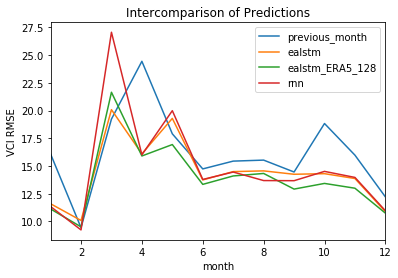

In [6]:
ax = (
    monthly_scores
    .where(monthly_scores.metric == 'rmse')
    .drop(columns=['year', 'metric'])
).plot('month')

ax.set_title('Intercomparison of Predictions')
ax.set_ylabel('VCI RMSE')

In [7]:
monthly_scores.where(monthly_scores.metric == 'rmse')

,month,year,previous_month,ealstm,ealstm_ERA5_128,rnn,metric
0,1.0,2018.0,16.086050,11.596791,11.124692,11.345142,rmse
1,2.0,2018.0,9.440623,10.087028,9.512637,9.235682,rmse
2,3.0,2018.0,19.234719,20.086194,21.655906,27.069588,rmse
3,4.0,2018.0,24.447388,16.096951,15.906613,16.013875,rmse
4,5.0,2018.0,17.905360,19.297321,16.936694,19.993250,rmse
5,6.0,2018.0,14.739885,13.746326,13.343983,13.788436,rmse
6,7.0,2018.0,15.442730,14.496235,14.103834,14.457249,rmse
7,8.0,2018.0,15.533300,14.561860,14.329475,13.688212,rmse
8,9.0,2018.0,14.460343,14.256204,12.919532,13.675853,rmse
9,10.0,2018.0,18.835252,14.309289,13.430140,14.516176,rmse


# view the spatial predictions any patterns?

In [8]:
monthly_scores.head()

,month,year,previous_month,ealstm,ealstm_ERA5_128,rnn,metric
0,1.0,2018.0,16.086050,11.596791,11.124692,11.345142,rmse
1,2.0,2018.0,9.440623,10.087028,9.512637,9.235682,rmse
2,3.0,2018.0,19.234719,20.086194,21.655906,27.069588,rmse
3,4.0,2018.0,24.447388,16.096951,15.906613,16.013875,rmse
4,5.0,2018.0,17.905360,19.297321,16.936694,19.993250,rmse


In [9]:
from src.analysis import read_pred_data, read_true_data

In [10]:
ealstm_256 = read_pred_data('ealstm', data_dir=data_dir)[0]
ealstm_128 = read_pred_data('ealstm_ERA5_128', data_dir=data_dir)[0]
previous_month = read_pred_data('previous_month', data_dir=data_dir)[0]
rnn = read_pred_data('rnn', data_dir=data_dir)[0]

obs = read_true_data(data_dir=data_dir)

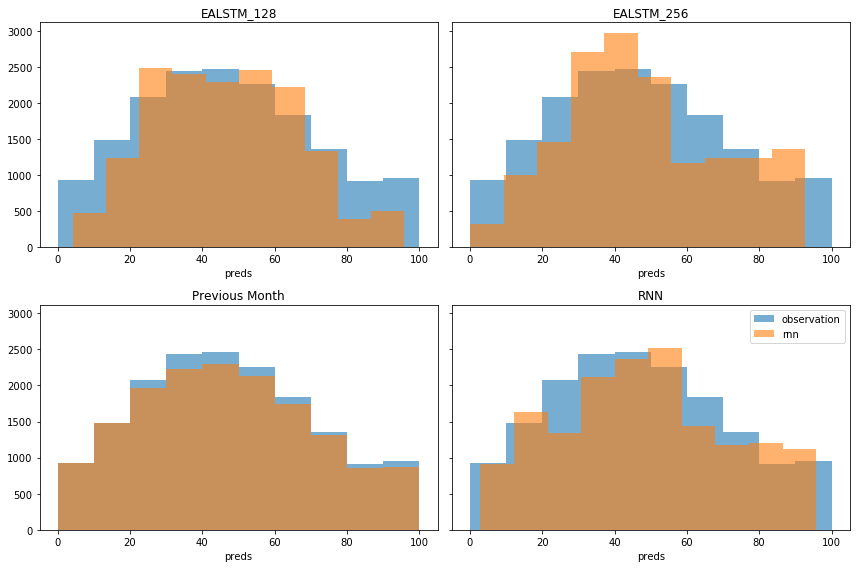

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
obs.plot(alpha=0.6, label='observation', ax=axs[0,0]);
ealstm_128.preds.plot(alpha=0.6, label='ealstm_128', ax=axs[0,0]);
axs[0,0].set_title('EALSTM_128')

obs.plot(alpha=0.6, label='observation', ax=axs[0,1]);
ealstm_256.preds.plot(alpha=0.6, label='ealstm_256', ax=axs[0,1]);
axs[0,1].set_title('EALSTM_256')

obs.plot(alpha=0.6, label='observation', ax=axs[1,0]);
previous_month.preds.plot(alpha=0.6, label='previous_month', ax=axs[1,0]);
axs[1,0].set_title('Previous Month')

obs.plot(alpha=0.6, label='observation', ax=axs[1,1]);
rnn.preds.plot(alpha=0.6, label='rnn', ax=axs[1,1]);
axs[1,1].set_title('RNN')
plt.legend()

plt.tight_layout()

# spatial predictions

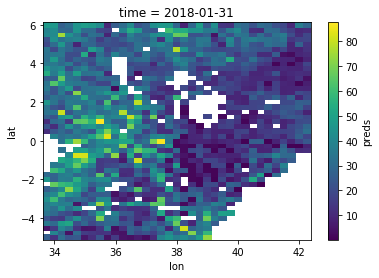

In [12]:
ealstm_256.isel(time=0).preds.plot()

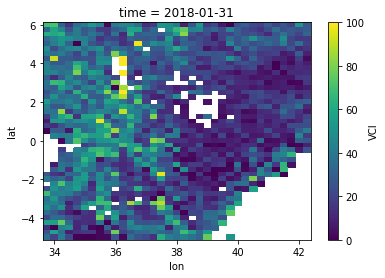

In [13]:
obs.isel(time=0).plot()

# analysis by region

In [14]:
from src.analysis import AdministrativeRegionAnalysis
# from src.analysis import KenyaGroupbyRegion

In [15]:
warnings.filterwarnings('ignore')

analyzer = AdministrativeRegionAnalysis(data_dir=data_dir)
analyzer.analyze()

Initialised the Region Analysis for experiment: one_month_forecast
Models: ['ealstm', 'ealstm_ERA5_128', 'linear_network', 'linear_regression', 'previous_month', 'rnn']
Regions: ['district_l2_kenya.nc']
Region Type: administrative_boundaries
* Analyzing for district_l2_kenya *

** Analyzing for ealstm-district_l2_kenya **
** Written ealstm csv to /Volumes/Lees_Extend/data/ecmwf_sowc/data/analysis/region_analysis/ealstm/ealstm_district_l2_kenya.csv **

** Analyzing for ealstm_ERA5_128-district_l2_kenya **
** Written ealstm_ERA5_128 csv to /Volumes/Lees_Extend/data/ecmwf_sowc/data/analysis/region_analysis/ealstm_ERA5_128/ealstm_ERA5_128_district_l2_kenya.csv **

** Analyzing for linear_network-district_l2_kenya **
** Written linear_network csv to /Volumes/Lees_Extend/data/ecmwf_sowc/data/analysis/region_analysis/linear_network/linear_network_district_l2_kenya.csv **

** Analyzing for linear_regression-district_l2_kenya **
** Written linear_regression csv to /Volumes/Lees_Extend/data/ecmw

In [16]:
region_plotter = analyzer.create_model_performance_by_region_geodataframe()
df = analyzer.df
gdf = region_plotter.gdf

The RegionGeoPlotter requires `geopandas` to be installed.
GroupbyRegion requires geopandas to be installed
Reading file: KEN_admin2_2002_DEPHA.shp
Reading file: Ken_Districts.shp
Reading file: Ken_Divisions.shp
Reading file: Kenya wards.shp
Reading file: Ken_Locations.shp
Reading file: Ken_Sublocations.shp
* Read shapefiles and stored in `RegionGeoPlotter.region_gdfs` *
* Assigned the complete GeoDataFrame to `RegionGeoPlotter.gdf`


In [17]:
# join true/preds into a GeoDataFrame
all_gdf = region_plotter.merge_all_model_performances_gdfs(analyzer.df)
all_gdf.head()

* Assigned the complete GeoDataFrame to `RegionGeoPlotter.gdf`


,admin_level_name,model,datetime,region_name,predicted_mean_value,true_mean_value,DISTNAME,geometry
0,district_l2_kenya,ealstm,2018-01-31,NAIROBI,4.403419e+01,38.839998,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
1,district_l2_kenya,linear_regression,2018-01-31,NAIROBI,-7.520514e+14,38.839998,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
2,district_l2_kenya,previous_month,2018-01-31,NAIROBI,6.069750e+01,38.839998,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
3,district_l2_kenya,rnn,2018-01-31,NAIROBI,4.942570e+01,38.839998,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
4,district_l2_kenya,ealstm_ERA5_128,2018-01-31,NAIROBI,5.019217e+01,38.839998,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...


### How does the error vary in each region?

#### Persistence

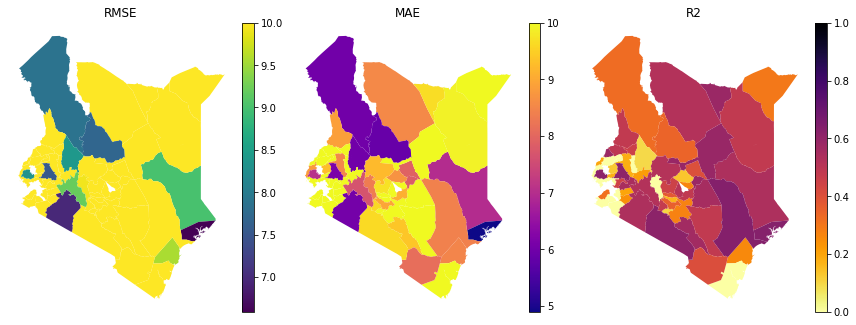

In [18]:
region_plotter.plot_all_regional_error_metrics(gdf.where(gdf.model == 'previous_month').dropna());
# plt.gcf().suptitle('Persistence Regional Errors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


#### EALSTM 256

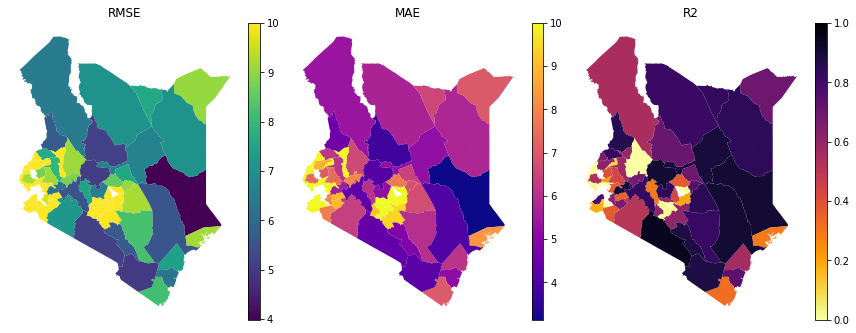

In [19]:
# gdf.where(gdf.model == 'ealstm').dropna().plot('rmse')
region_plotter.plot_all_regional_error_metrics(gdf.where(gdf.model == 'ealstm').dropna());
# plt.gcf().suptitle('EALSTM Regional Errors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### EALSTM 128

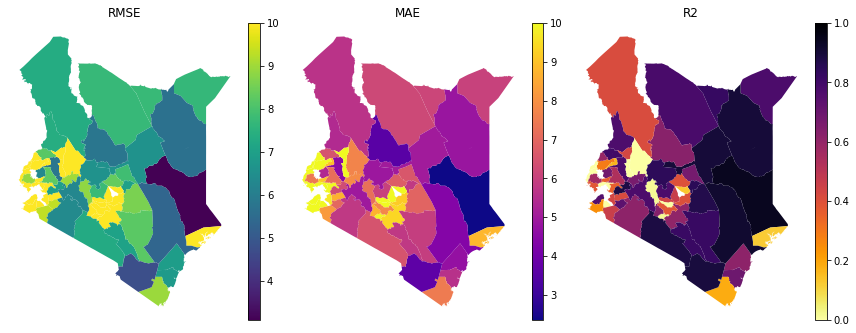

In [20]:
region_plotter.plot_all_regional_error_metrics(gdf.where(gdf.model == 'ealstm_ERA5_128').dropna());
# plt.gcf().suptitle('EALSTM Regional Errors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### RNN

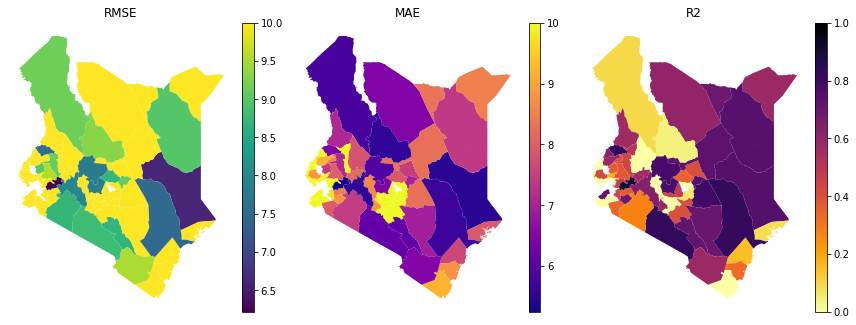

In [21]:
region_plotter.plot_all_regional_error_metrics(gdf.where(gdf.model == 'rnn').dropna());
# plt.gcf().suptitle('RNN Regional Errors')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [22]:
gdf.head()

,model,admin_level_name,region_name,rmse,mae,r2,DISTNAME,geometry
0,ealstm,district_l2_kenya,NAIROBI,2.051673e+01,1.596918e+01,-2.216576e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
1,previous_month,district_l2_kenya,NAIROBI,1.758467e+01,1.497608e+01,1.025673e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
2,rnn,district_l2_kenya,NAIROBI,2.043045e+01,1.643162e+01,-2.114037e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
3,linear_network,district_l2_kenya,NAIROBI,1.547939e+02,6.673282e+01,-6.854102e+01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
4,linear_regression,district_l2_kenya,NAIROBI,8.129755e+14,7.251342e+14,-1.918174e+27,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...


In [23]:
# extract a GeoDataFrame that we can plot
region_plotter = analyzer.create_model_performance_by_region_geodataframe()
metric_gdf = region_plotter.gdf
metric_gdf.head()

GroupbyRegion requires geopandas to be installed
Reading file: KEN_admin2_2002_DEPHA.shp
Reading file: Ken_Districts.shp
Reading file: Ken_Divisions.shp
Reading file: Kenya wards.shp
Reading file: Ken_Locations.shp
Reading file: Ken_Sublocations.shp
* Read shapefiles and stored in `RegionGeoPlotter.region_gdfs` *
* Assigned the complete GeoDataFrame to `RegionGeoPlotter.gdf`


,model,admin_level_name,region_name,rmse,mae,r2,DISTNAME,geometry
0,ealstm,district_l2_kenya,NAIROBI,2.051673e+01,1.596918e+01,-2.216576e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
1,previous_month,district_l2_kenya,NAIROBI,1.758467e+01,1.497608e+01,1.025673e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
2,rnn,district_l2_kenya,NAIROBI,2.043045e+01,1.643162e+01,-2.114037e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
3,linear_network,district_l2_kenya,NAIROBI,1.547939e+02,6.673282e+01,-6.854102e+01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
4,linear_regression,district_l2_kenya,NAIROBI,8.129755e+14,7.251342e+14,-1.918174e+27,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...


### How do we do when we compare to the [Adede et al 2019](https://www.mdpi.com/2072-4292/11/9/1099/htm) paper?

The paper presents $R^2$ results for four districts:
- Mandera - 0.71
- Marsabit - 0.77
- Turkana - 0.83
- Wajir - 0.71

These are defined as Arid and Semi Arid Lands (ASAL) districts. They are actively monitored by the National Drought Management Authority.

In [24]:
from sklearn.metrics import r2_score
from typing import Dict

def rolling_average(district_csv: pd.DataFrame) -> Dict[str, float]:
    """Over three months"""
    relevant_districts = ['Mandera', 'Marsabit', 'Turkana', 'Wajir']

    district_csv['month'] = pd.to_datetime(district_csv.datetime).dt.month

    output_dict: Dict[str: float] = {}

    for district in relevant_districts:
        district_df = district_csv[district_csv.region_name == district.upper()]
        true, predicted = [], []
        for i in range(1, 12 - 1):
            min_month = i
            max_month = i + 3
            submonth = district_df[(district_df.month >= min_month) & (district_df.month < max_month)]
            predicted.append(submonth.predicted_mean_value.mean())
            true.append(submonth.true_mean_value.mean())
        district_score = r2_score(true, predicted)
        print(f'For {district}, r2 score: {district_score}')
        output_dict[district] = district_score
    
    return output_dict

In [25]:
print('Performance for EALSTM')
rolling_average(all_gdf[all_gdf.model == 'ealstm']);
print()

print('Performance for Persistence')
rolling_average(all_gdf[all_gdf.model == 'previous_month']);
print()

print('Performance for RNN')
rolling_average(all_gdf[all_gdf.model == 'rnn']);
print()

Performance for EALSTM
For Mandera, r2 score: 0.8151662614826201
For Marsabit, r2 score: 0.7478656899685967
For Turkana, r2 score: 0.4432176242580994
For Wajir, r2 score: 0.8658232939331323

Performance for Persistence
For Mandera, r2 score: 0.5214733855608145
For Marsabit, r2 score: 0.4263750797315645
For Turkana, r2 score: 0.4241101961679359
For Wajir, r2 score: 0.4509264686109441

Performance for RNN
For Mandera, r2 score: 0.7683449978300687
For Marsabit, r2 score: 0.5296739006824711
For Turkana, r2 score: -0.011405166839093761
For Wajir, r2 score: 0.778361013437218



# What is going on in Turkana?

In [26]:
# ealstm_256
# ealstm_128
# previous_month
# rnn
# obs

In [27]:
gdf.head()

,model,admin_level_name,region_name,rmse,mae,r2,DISTNAME,geometry
0,ealstm,district_l2_kenya,NAIROBI,2.051673e+01,1.596918e+01,-2.216576e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
1,previous_month,district_l2_kenya,NAIROBI,1.758467e+01,1.497608e+01,1.025673e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
2,rnn,district_l2_kenya,NAIROBI,2.043045e+01,1.643162e+01,-2.114037e-01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
3,linear_network,district_l2_kenya,NAIROBI,1.547939e+02,6.673282e+01,-6.854102e+01,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...
4,linear_regression,district_l2_kenya,NAIROBI,8.129755e+14,7.251342e+14,-1.918174e+27,NAIROBI,POLYGON ((36.90575473150634 -1.159051062893981...


# How do our Models perform overall (RMSE Histogram)

In [28]:
from src.analysis import spatial_rmse

%autoreload 2

### Spatial RMSE of each model

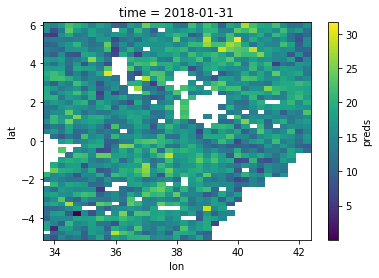

In [29]:
pred_da = previous_month.preds.transpose('time', 'lat', 'lon')
previous_month_rmse = spatial_rmse(true_da=obs, pred_da=pred_da)
previous_month_rmse.plot()

## Calculate the difference between the MODEL - PERSISTENCE
- red = the previous month has lower rmse
- blue = good, the RMSE is lower for the model

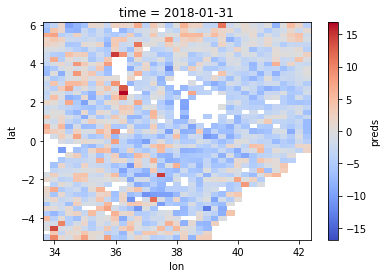

In [30]:
pred_da = ealstm_256.preds.transpose('time', 'lat', 'lon')
ealstm_256_rmse = spatial_rmse(true_da=obs, pred_da=pred_da)
(ealstm_256_rmse - previous_month_rmse).plot(cmap='coolwarm')

Text(0.5, 1.0, 'EALSTM')

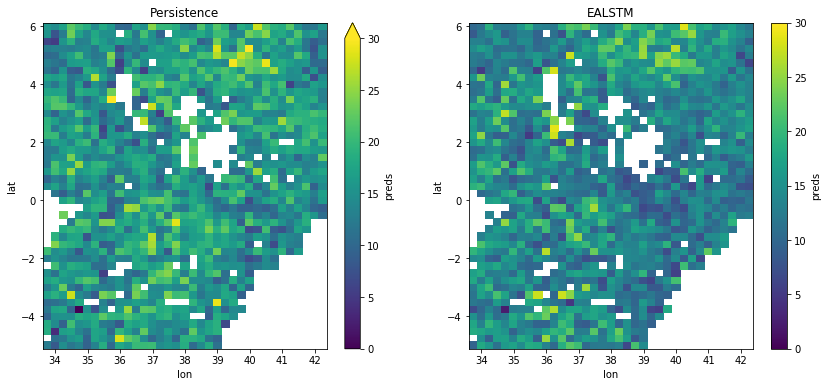

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

previous_month_rmse.plot(ax=ax1, vmin=0, vmax=30)
ax1.set_title('Persistence')
ealstm_256_rmse.plot(ax=ax2, vmin=0, vmax=30)
ax2.set_title('EALSTM')

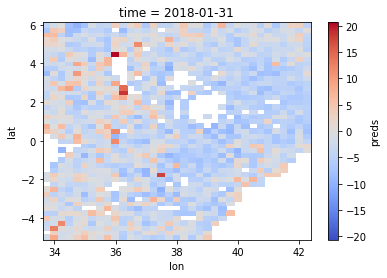

In [32]:
pred_da = ealstm_128.preds.transpose('time', 'lat', 'lon')
ealstm_128_rmse = spatial_rmse(true_da=obs, pred_da=pred_da)
(ealstm_128_rmse - previous_month_rmse).plot(cmap='coolwarm')

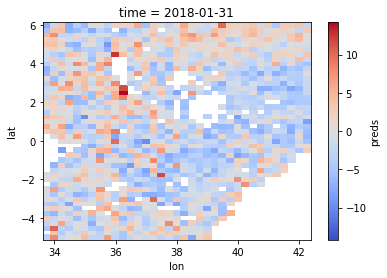

In [33]:
pred_da = rnn.preds.transpose('time', 'lat', 'lon')
rnn_rmse = spatial_rmse(true_da=obs, pred_da=pred_da)
(rnn_rmse - previous_month_rmse).plot(cmap='coolwarm')

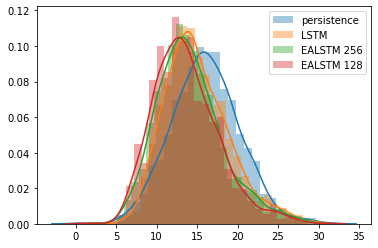

In [34]:
from src.utils import drop_nans_and_flatten
import seaborn as sns

previous_month_rmse
sns.distplot(drop_nans_and_flatten(previous_month_rmse), label='persistence')
sns.distplot(drop_nans_and_flatten(rnn_rmse), label='LSTM')
sns.distplot(drop_nans_and_flatten(ealstm_256_rmse), label='EALSTM 256')
sns.distplot(drop_nans_and_flatten(ealstm_128_rmse), label='EALSTM 128')

plt.legend()